In [23]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# MNIST

## Load Data

In [24]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [25]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

unique, counts = np.unique(y_train, return_counts=True)
print(f"Train Labels: {dict(zip(unique, counts))}")

unique, counts = np.unique(y_test, return_counts=True)
print(f"Test Labels: {dict(zip(unique, counts))}")

Train Labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test Labels: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [26]:
indexes = np.random.randint(0, x_train.shape[0], size=9)
images = x_train[indexes]
labels = y_train[indexes]

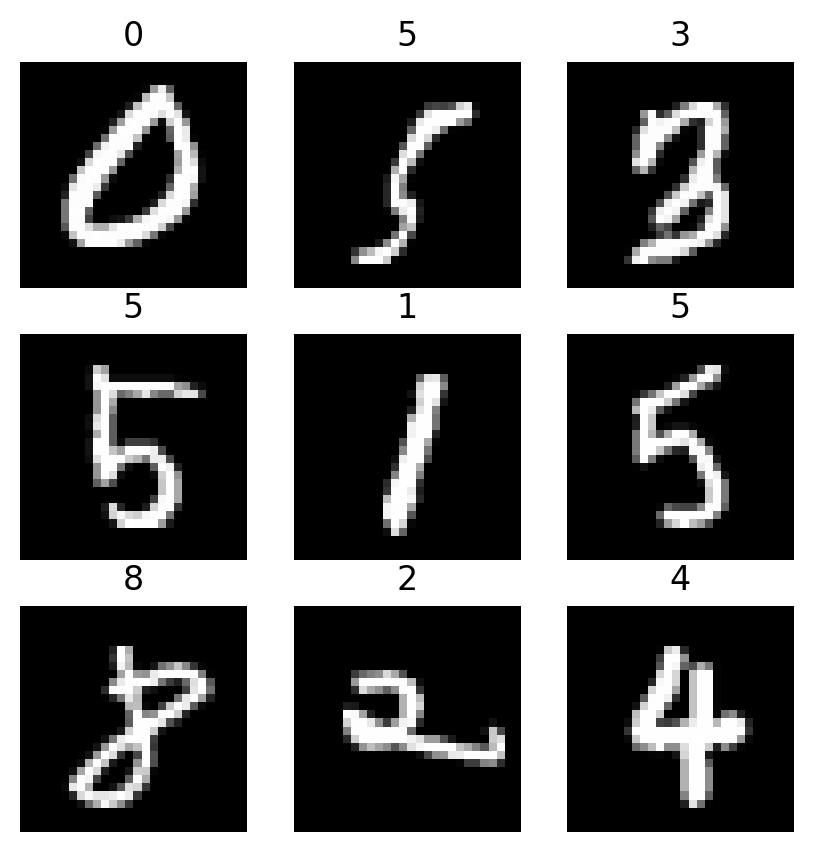

In [27]:
plt.figure(figsize=(5, 5))
for i in range(len(indexes)):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    plt.title(labels[i])
plt.show()

## Preprocessing

In [28]:
num_labels = len(unique)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

x_train = np.reshape(x_train, [-1, x_train.shape[1], x_train.shape[2], 1])
x_test = np.reshape(x_test, [-1, x_test.shape[1], x_test.shape[2], 1])
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

input_shape = x_train.shape[1:]

# LeNet-5

### Input Shape: 28x28x1(MNIST)
**Convolution Layers**

1. ConV_1 (5x5, s=1, activation='tanh', filters=  6, padding='same')
2. Pooling_2 (f=2, s=2, padding='valid')
3. ConV_3 (5x5, s=1, activation='tanh', filters= 16, padding='valid')
4. Pooling_4 (f=2, s=2, padding='valid')
5. ConV_5 (5x5, s=1, activation='tanh', filters=120, padding='valid')

**Fully Connected Layers**

6. Dense(units=84, activation='tanh')

**Outputs**

7. Dense(units=10, activation='softmax')

In [29]:
from LeNet import build_lenet_5, lr_schedule

In [30]:
model = build_lenet_5(input_shape=input_shape)
model.summary()

Model: "LeNet_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 120)         4812

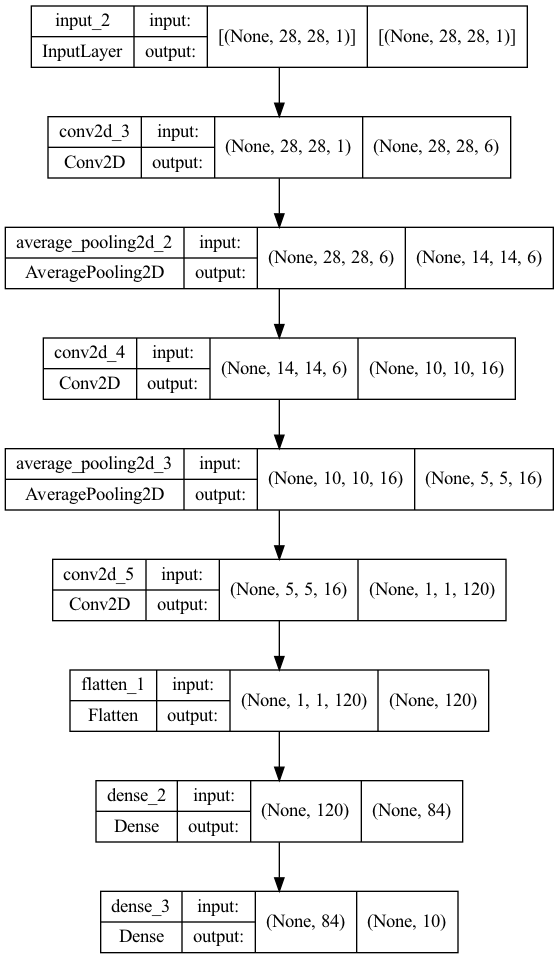

In [31]:
keras.utils.plot_model(model=model,
                       to_file='LeNet5.png',
                       show_shapes=True
                      )

In [32]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
import os

save_dir = os.path.join(os.getcwd(), 'save_models')
model_name = 'mnist_lesnet_v5.{epoch:03d}.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

lr_scheduler = LearningRateScheduler(lr_schedule)
checkpoints = ModelCheckpoint(filepath=filepath,
                              monitor='val_accuracy',
                              verbose=1,
                              save_best_only=True
                             )
callbacks = [checkpoints, lr_scheduler]

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy']
             )

In [33]:
hist = model.fit(x_train, y_train, 
                 batch_size=32, 
                 epochs=20,
                 validation_data=(x_test, y_test),
                 callbacks=callbacks,
                 verbose=2,
                 shuffle=True
                )

Epoch 1/20


2023-03-16 19:58:16.388220: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-16 19:58:31.242165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.57940, saving model to /Users/jaehwan/Desktop/Git/Artificial-Intelligence/DeepLearning/CV_Model/save_models/mnist_lesnet_v5.001.h5
1875/1875 - 17s - loss: 2.2277 - accuracy: 0.3279 - val_loss: 2.1048 - val_accuracy: 0.5794 - lr: 5.0000e-04 - 17s/epoch - 9ms/step
Epoch 2/20

Epoch 2: val_accuracy improved from 0.57940 to 0.72470, saving model to /Users/jaehwan/Desktop/Git/Artificial-Intelligence/DeepLearning/CV_Model/save_models/mnist_lesnet_v5.002.h5
1875/1875 - 17s - loss: 1.8387 - accuracy: 0.6527 - val_loss: 1.4798 - val_accuracy: 0.7247 - lr: 5.0000e-04 - 17s/epoch - 9ms/step
Epoch 3/20

Epoch 3: val_accuracy improved from 0.72470 to 0.79540, saving model to /Users/jaehwan/Desktop/Git/Artificial-Intelligence/DeepLearning/CV_Model/save_models/mnist_lesnet_v5.003.h5
1875/1875 - 16s - loss: 1.1995 - accuracy: 0.7521 - val_loss: 0.9614 - val_accuracy: 0.7954 - lr: 5.0000e-04 - 16s/epoch - 9ms/step
Epoch 4/20

Epoch 4: val_accuracy improved

In [34]:
loss, acc = model.evaluate(x_test, y_test, batch_size=32)
print(f"Test accuracy: {(100*acc):>.1f}%")

313/313 [==============================] - 2s 6ms/step - loss: 0.6424 - accuracy: 0.8521
Test accuracy: 85.2%


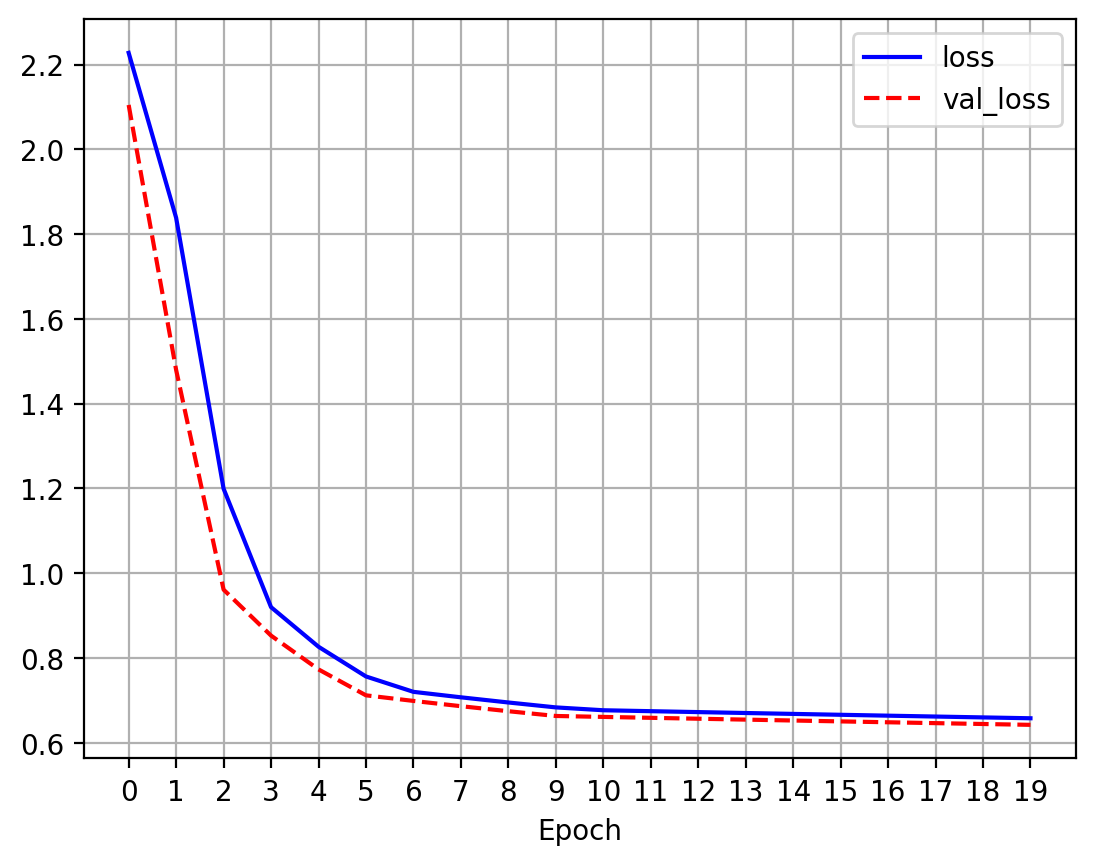

In [35]:
plt.plot(hist.history['loss'], 'b-', label='loss')
plt.plot(hist.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.xticks(range(20))
plt.grid()
plt.legend()
plt.show()

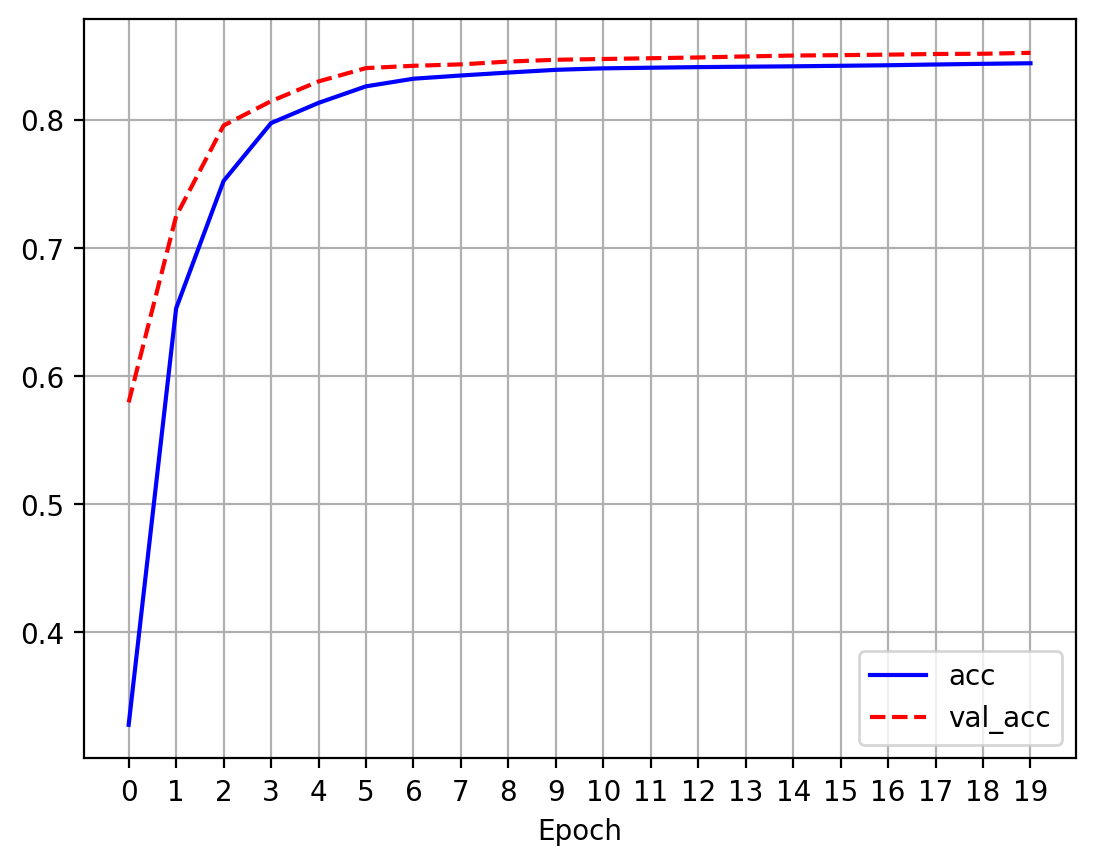

In [36]:
plt.plot(hist.history['accuracy'], 'b-', label='acc')
plt.plot(hist.history['val_accuracy'], 'r--', label='val_acc')
plt.xlabel('Epoch')
plt.xticks(range(20))
plt.grid()
plt.legend()
plt.show()

In [37]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [38]:
new_model = build_lenet_5(input_shape=input_shape)
new_model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy']
                 )

In [39]:
new_model.evaluate(x_test,y_test)

 17/313 [>.............................] - ETA: 1s - loss: 2.3176 - accuracy: 0.0754

2023-03-16 20:05:29.807979: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step - loss: 2.3239 - accuracy: 0.0914


[2.3238861560821533, 0.09140000492334366]

In [43]:
log_dir = 'log/lenet_5'
tensorboard_cb = keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

In [44]:
new_model.fit(x_train, y_train,
              epochs=20,
              batch_size=32,
              validation_data=(x_test, y_test),
              callbacks=[tensorboard_cb]
             )

Epoch 1/20
   1/1875 [..............................] - ETA: 8:36 - loss: 2.3039 - accuracy: 0.0938

2023-03-16 20:07:41.789149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 18s 10ms/step - loss: 0.6485 - accuracy: 0.8320 - val_loss: 0.2978 - val_accuracy: 0.9176
Epoch 2/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2682 - accuracy: 0.9204 - val_loss: 0.2164 - val_accuracy: 0.9368
Epoch 3/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2016 - accuracy: 0.9399 - val_loss: 0.1642 - val_accuracy: 0.9519
Epoch 4/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1577 - accuracy: 0.9530 - val_loss: 0.1337 - val_accuracy: 0.9605
Epoch 5/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1280 - accuracy: 0.9621 - val_loss: 0.1093 - val_accuracy: 0.9682
Epoch 6/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1073 - accuracy: 0.9683 - val_loss: 0.0945 - val_accuracy: 0.9713
Epoch 7/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0922 - accuracy: 0.9730 - val_loss: 0.0814 - val_accuracy:

In [45]:
%tensorboard --logdir $log_dir

In [ ]:
"""
.save_weights(path)
.save(path)
keras.models.load_model(path)
"""